In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess
import time
import random

%matplotlib inline

In [4]:
args = 'NursingData_6-3.csv'
outfile = args.split('.')[0] + '_clean.csv'
outfile

'NursingData_6-3_clean.csv'

In [2]:
df = pd.read_csv('NursingData_clean.csv')

In [3]:
df.head()

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN
2,2,2015-06-21 02:37:57,2015,6,Late night,14.50,0.0,0,14.50,NaN,NaN
3,3,2015-06-21 05:23:55,2015,6,Late night,0.00,20.0,0,20.00,NaN,NaN
4,4,2015-06-21 05:47:59,2015,6,Late night,22.18,0.0,0,22.18,NaN,NaN


In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3266
Data columns (total 11 columns):
Unnamed: 0    3267 non-null int64
time          3267 non-null datetime64[ns]
Year          3267 non-null int64
Month         3267 non-null int64
TimeofDay     3267 non-null object
LeftFeed      2560 non-null float64
RightFeed     2560 non-null float64
BotFeed       3267 non-null float64
TotalFeed     2560 non-null float64
BotAmt        77 non-null float64
Sleep         674 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 306.3+ KB


# Plotting eat/sleep periods for one day

In [6]:
#creating dummy df
date = '1/22/2016'
#for date string listed, parse into dt format 
parsed = dt.datetime.strptime(date,'%m/%d/%Y')
#create date range for index
dateind = pd.date_range(date, periods=1440, freq='min')

ts = pd.DataFrame(np.zeros((len(dateind),2)),columns=['Eat','Sleep'],index=dateind)

In [7]:
#cleaner new way to do it
for i,dtinfo in enumerate(df.time):
    if dtinfo.date() == parsed.date():
        eatsleep = ''
        if df.TotalFeed[i] > 0:
            eatsleep = 'e'
            intmin = int(df.TotalFeed[i])#don't care about seconds
            endtime = dtinfo + dt.timedelta(minutes = intmin)
        if df.Sleep[i] > 0:
            eatsleep = 's'
            inthrs = int(df.Sleep[i])
            intmin = int((df.Sleep[i]-inthrs)*60)
            endtime = dtinfo + dt.timedelta(hours = inthrs, minutes = intmin)
        for j,timebymin in enumerate(ts.index):
            if dtinfo.time() < timebymin.time() and timebymin.time() <= endtime.time():
                if eatsleep == 'e':
                    ts.Eat[j] = 1
                if eatsleep == 's':
                    ts.Sleep[j] = 1

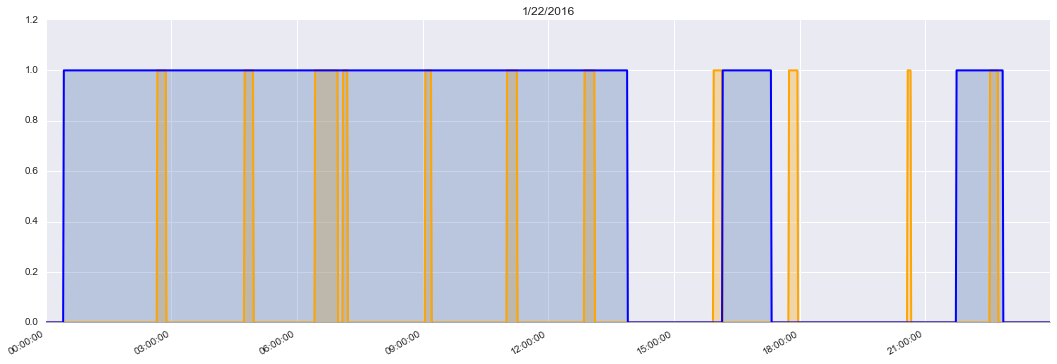

In [8]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.plot(ts.index,ts.Eat,'orange',linewidth=2)
ax.fill_between(ts.index, 0, ts.Eat,alpha=0.3,facecolor='orange')
ax.plot(ts.index,ts.Sleep,'b',linewidth=2)
ax.fill_between(ts.index,0, ts.Sleep,alpha=0.3)
ax.set_ylim(0,1.2)
ax.set_title(date)
fig.autofmt_xdate()
fig.savefig('Day20160122.png')

In [9]:
#eventually...
ts.resample('5min',how='sum',closed='left',label='left')

,Eat,Sleep
2016-01-22 00:00:00,0,0
2016-01-22 00:05:00,0,0
2016-01-22 00:10:00,0,0
2016-01-22 00:15:00,0,0
2016-01-22 00:20:00,0,0
2016-01-22 00:25:00,0,4
2016-01-22 00:30:00,0,5
2016-01-22 00:35:00,0,5
2016-01-22 00:40:00,0,5
2016-01-22 00:45:00,0,5


# --------For all days

## Cleaning the data

In [10]:
#check formatting
tsread = pd.read_csv('NursingData_clean_ts.csv', header=[0,1],index_col=[0])
tsread.index = [dt.datetime.strptime(x, "%H:%M:%S").time() for x in tsread.index]
tsread.columns.set_levels([dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date() for x in tsread.columns.levels[0].values], 0, inplace=True)
tsread.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          0     0          0     0          0     0   
00:01:00          0     0          0     0          0     0          0     0   
00:02:00          0     0          0     0          0     0          0     0   
00:03:00          0     0          0     0          0     0          0     0   
00:04:00          0     0          0     0          0     0          0     0   

         2015-06-25        ...  2016-01-23       2016-01-24       2016-01-25  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          0     0  ...           0     0          0     0          0   
00:01:00          0     0  ...           0     0          0     0          0   
00:02:00          0     0  ...           0     0          0     0          0   
00:03:00          0     0  ...           0     0          0     0          0   
00:04:00          0     0  ...           0     0          0     0          0   

               2016-01-26       2015-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          0     0          0     0  
00:01:00     0          0     0          0     0  
00:02:00     0          0     0          0     0  
00:03:00     0          0     0          0     0  
00:04:00     0          0     0          0     0  

[5 rows x 442 columns]

In [11]:
eats= tsread.xs('Eat',level=1,axis=1)
sleeps = tsread.xs('Sleep',level=1,axis=1)

In [12]:
#preview some data
tsread.iloc[125:130,400:420]

2016-01-07       2016-01-08       2016-01-09       2016-01-10        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
02:05:00          0     0          0     1          0     1          0     1   
02:06:00          0     0          0     1          0     1          0     1   
02:07:00          0     0          0     1          0     1          0     1   
02:08:00          0     0          0     1          0     1          0     1   
02:09:00          0     0          0     1          0     1          0     1   

         2016-01-11       2016-01-12       2016-01-13       2016-01-14        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
02:05:00          1     1          0     1          0     0          0     1   
02:06:00          1     1          0     1          0     0          0     1   
02:07:00          1     1          0     1          0     0          0     1   
02:08:00          1     1          0     1          0     0          0     1   
02:09:00          1     1          0     1          0     0          0     1   

         2016-01-15       2016-01-16        
                Eat Sleep        Eat Sleep  
02:05:00          0     1          0     1  
02:06:00          0     1          0     1  
02:07:00          0     1          0     1  
02:08:00          0     1          0     1  
02:09:00          0     1          0     1

In [17]:
len(tsread.columns.levels[0])

221

## Plotting the data

In [14]:
ts = tsread

In [54]:
set([x.month for x in tsread.columns.levels[0]])

{1, 5, 6, 7, 8, 9, 10, 11, 12}

In [42]:
#gets used in the smoothing
timeind = pd.date_range("00:00", "23:59", freq='min').to_pydatetime()###Very important!
xtime = [int(x.hour)+int(x.minute)/60 for x in ts.index]
xtime[:5]

[0.0, 0.016666666666666666, 0.03333333333333333, 0.05, 0.06666666666666667]

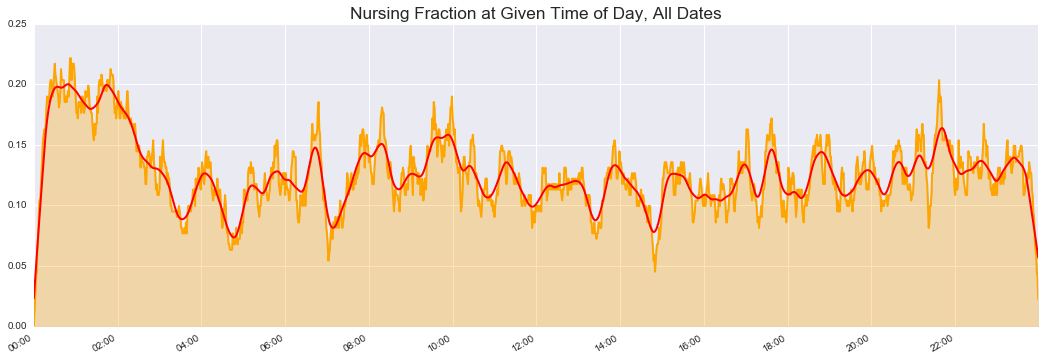

In [43]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(timeind,eats.sum(axis=1)/len(tsread.columns.levels[0]),'orange',linewidth=2)
ax.fill_between(timeind, 0, eats.sum(axis=1)/len(tsread.columns.levels[0]),alpha=0.3,facecolor='orange')
filtered = lowess(eats.sum(axis=1)/len(tsread.columns.levels[0]), xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(timeind, filtered[:,1], 'r',linewidth=2)
#ax.set_ylim(0,1.2)
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('Nursing Fraction at Given Time of Day, All Dates',fontsize='xx-large')
fig.autofmt_xdate()

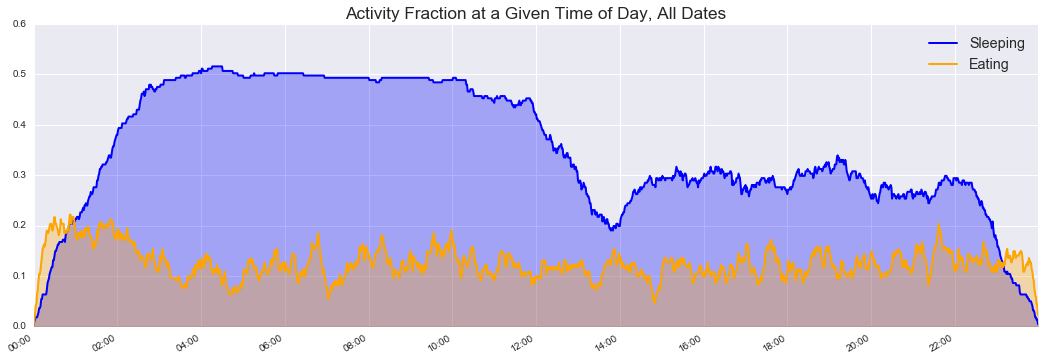

In [44]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(timeind,sleeps.sum(axis=1)/len(tsread.columns.levels[0]),'b',linewidth=2,label='Sleeping')
ax.fill_between(timeind, 0, sleeps.sum(axis=1)/len(tsread.columns.levels[0]),alpha=0.3,facecolor='b')
ax.plot(timeind,eats.sum(axis=1)/len(tsread.columns.levels[0]),'orange',linewidth=2,label='Eating')
ax.fill_between(timeind, 0, eats.sum(axis=1)/len(tsread.columns.levels[0]),alpha=0.3,facecolor='orange')
#filtered = lowess(sleeps.sum(axis=1)/len(datearr), xtime, is_sorted=True, frac=0.025, it=0)
#ax.plot(ts.index, filtered[:,1], 'r',linewidth=2)
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('Activity Fraction at a Given Time of Day, All Dates',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.autofmt_xdate()
fig.savefig('Activity_All.png')

In [45]:
monthnum = 1
motxt = time.strftime('%B',time.strptime(str(monthnum),'%m'))
mocheck = [x.month == monthnum for x in ts.columns.levels[0]]
moflag = []
for ans in mocheck:
    moflag.append(ans)
    moflag.append(ans)

onemo = ts.loc[:,moflag]
print(len(onemo.columns)/2)

sleepy = onemo.xs('Sleep',level=1,axis=1).sum(axis=1)/(len(onemo.columns)/2)
eaty = onemo.xs('Eat',level=1,axis=1).sum(axis=1)/(len(onemo.columns)/2)

onemo.head()

26.0


2016-01-02       2016-01-03       2016-01-04       2016-01-05        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          0     0          0     0          0     0   
00:01:00          0     0          0     0          0     0          0     0   
00:02:00          0     0          0     0          0     0          0     0   
00:03:00          1     0          0     0          0     0          0     0   
00:04:00          1     0          0     0          0     0          0     0   

         2016-01-06        ...  2016-01-23       2016-01-24       2016-01-25  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          0     0  ...           0     0          0     0          0   
00:01:00          0     0  ...           0     0          0     0          0   
00:02:00          0     0  ...           0     0          0     0          0   
00:03:00          0     0  ...           0     0          0     0          0   
00:04:00          0     0  ...           0     0          0     0          0   

               2016-01-26       2015-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          0     0          0     0  
00:01:00     0          0     0          0     0  
00:02:00     0          0     0          0     0  
00:03:00     0          0     0          0     0  
00:04:00     0          0     0          0     0  

[5 rows x 52 columns]

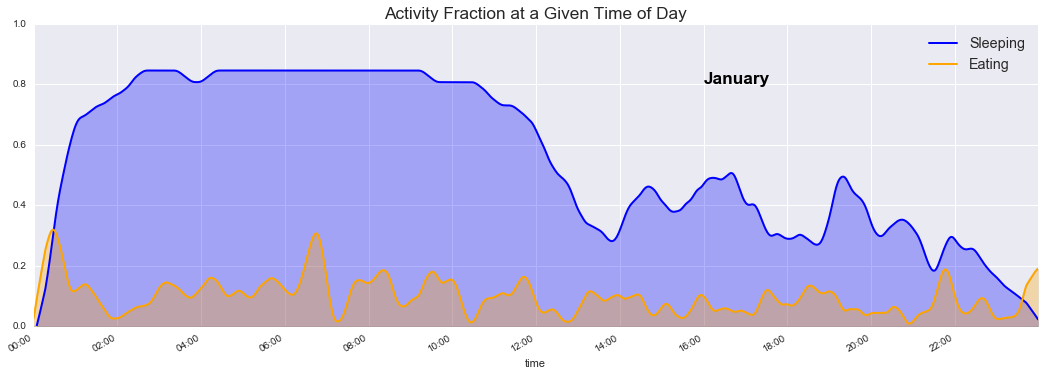

In [52]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

####Plot Sleep
filtereds = lowess(sleepy, xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(timeind, filtereds[:,1], 'b',linewidth=2,label='Sleeping')
ax.fill_between(timeind, 0, filtereds[:,1],alpha=0.3,facecolor='b')
#ax.plot(ts.index,sleepy,'b',linewidth=2,label='Sleeping')
#ax.fill_between(ts.index, 0, sleepy,alpha=0.3,facecolor='b')

####Plot Eat
filterede = lowess(eaty, xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(timeind, filterede[:,1], 'orange',linewidth=2,label='Eating')
ax.fill_between(timeind, 0, filterede[:,1],alpha=0.3,facecolor='orange')
#ax.plot(ts.index,eaty,'orange',linewidth=2,label='Eating')
#ax.fill_between(ts.index, 0, eaty,alpha=0.3,facecolor='orange')

####Axis formatting
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('time')
ax.set_title('Activity Fraction at a Given Time of Day',fontsize='xx-large')
ax.text('16:00',max(max(filterede[:,1]),max(filtereds[:,1]))*0.95,motxt,fontsize='xx-large',color='k',fontweight='bold')
ax.legend(fontsize='x-large')
ax.set_ylim(0,1)
fig.autofmt_xdate()
filename = 'Activity_' + str(monthnum) + '.png'
fig.savefig(filename)

In [ ]:
#animation of running sum()? ~30 frames per month?  good use of resampling?